<a href="https://colab.research.google.com/github/icosahedron10/cifar10-cnn/blob/main/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import tensorflow as tf
import numpy as npy
import matplotlib.pyplot as plt
import visualkeras
import seaborn as sbn

from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout 
from tensorflow.keras.layers import MaxPooling2D, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
cifar10_full = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10_full.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


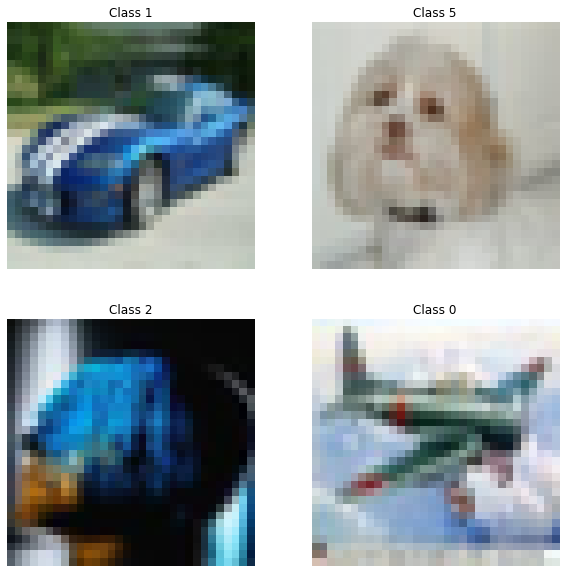

In [4]:
# choose 4 random indices from the training data
indices = npy.random.choice(x_train.shape[0], 4, replace=False)

# get the corresponding images and labels
images = x_train[indices]
labels = y_train[indices][:, 0]

# plot the images
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
ax = ax.ravel()

# iterate over the images and labels
for i, (image, label) in enumerate(zip(images, labels)):
    ax[i].imshow(npy.squeeze(image))
    ax[i].set_title(f'Class {label}')
    ax[i].axis('off')

# display the plot
plt.show()

In [5]:
x_train[0, 1, 14]

array([109,  70,  33], dtype=uint8)

In [6]:
x_train = x_train / 255
x_test = x_test / 255

x_train[0, 1, 14]

array([0.42745098, 0.2745098 , 0.12941176])

In [7]:
y_train[2]

array([9], dtype=uint8)

In [8]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

y_train[2]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [9]:
model = Sequential()

model.add(Conv2D(filters = 32, 
                 kernel_size = (4,4), 
                 input_shape = (32, 32, 3), 
                 activation = 'relu'))

model.add(Conv2D(filters = 64, 
                 kernel_size = (4,4), 
                 input_shape = (32, 32, 3), 
                 activation = 'relu'))

model.add(Flatten())
model.add(Dense(256,  activation = 'relu'))
model.add(Dense(128,  activation = 'relu'))

model.add(Dense(10,  activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])

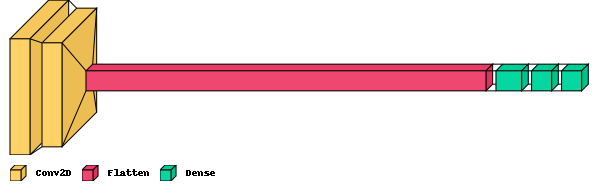

In [10]:
visualkeras.layered_view(model, legend = True)

In [11]:
stopping_criteria = EarlyStopping(monitor = 'val_loss',
                                  patience = 5)

trained_model = model.fit(x_train, y_train,
                          validation_data = (x_test, y_test),
                          batch_size = 32,
                          epochs = 100,
                          callbacks = [stopping_criteria]
                          )

Epoch 1/100
1563/1563 [==============================] - 9s 4ms/step - loss: 1.3850 - accuracy: 0.5013 - val_loss: 1.1624 - val_accuracy: 0.5933
Epoch 2/100
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9894 - accuracy: 0.6510 - val_loss: 1.0145 - val_accuracy: 0.6427
Epoch 3/100
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7345 - accuracy: 0.7421 - val_loss: 1.0666 - val_accuracy: 0.6500
Epoch 4/100
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4871 - accuracy: 0.8288 - val_loss: 1.1442 - val_accuracy: 0.6476
Epoch 5/100
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2878 - accuracy: 0.8999 - val_loss: 1.4197 - val_accuracy: 0.6382
Epoch 6/100
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1708 - accuracy: 0.9432 - val_loss: 1.7120 - val_accuracy: 0.6339
Epoch 7/100
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1284 - accuracy: 0.9571 - val_loss: 1.9909 - val_ac

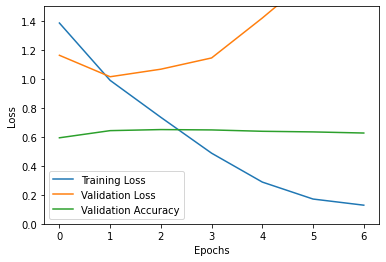

In [12]:
plt.plot(trained_model.history['loss'])
plt.plot(trained_model.history['val_loss'])
plt.plot(trained_model.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim((0, 1.5))
plt.legend(['Training Loss', 'Validation Loss', 'Validation Accuracy'])
plt.show()

In [13]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.9909 - accuracy: 0.6262


[1.990889072418213, 0.6262000203132629]

In [14]:
predict_x = model.predict(x_test) 
print(classification_report(npy.argmax(y_test, axis=1),
                            npy.argmax(predict_x,axis=1)))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.68      0.66      0.67      1000
           1       0.79      0.71      0.75      1000
           2       0.54      0.51      0.52      1000
           3       0.42      0.39      0.40      1000
           4       0.61      0.48      0.54      1000
           5       0.46      0.63      0.53      1000
           6       0.69      0.74      0.72      1000
           7       0.65      0.73      0.69      1000
           8       0.82      0.68      0.74      1000
           9       0.69      0.73      0.71      1000

    accuracy                           0.63     10000
   macro avg       0.63      0.63      0.63     10000
weighted avg       0.63      0.63      0.63     10000



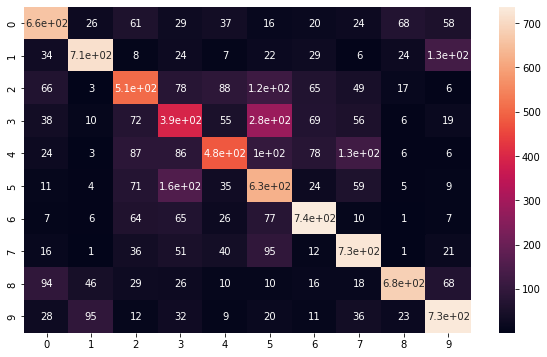

In [15]:
plt.figure(figsize = (10, 6))
sbn.heatmap(confusion_matrix(npy.argmax(y_test, axis=1),
                            npy.argmax(predict_x,axis=1)), 
            annot = True)

In [16]:
model = Sequential()

model.add(Conv2D(filters = 32, 
                 kernel_size = (4,4), 
                 input_shape = (32, 32, 3), 
                 activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 64, 
                 kernel_size = (4,4), 
                 input_shape = (32, 32, 3), 
                 activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(256,  activation = 'relu'))
model.add(Dense(128,  activation = 'relu'))

model.add(Dense(10,  activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])

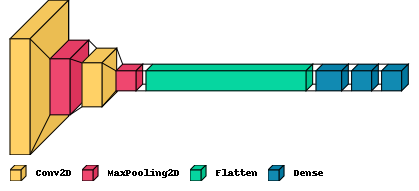

In [17]:
visualkeras.layered_view(model, legend = True)

In [18]:
trained_model = model.fit(x_train, y_train,
                          validation_data = (x_test, y_test),
                          batch_size = 32,
                          epochs = 100,
                          callbacks = [stopping_criteria]
                          )

Epoch 1/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4921 - accuracy: 0.4551 - val_loss: 1.2256 - val_accuracy: 0.5621
Epoch 2/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1320 - accuracy: 0.6024 - val_loss: 1.1211 - val_accuracy: 0.6158
Epoch 3/100
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9708 - accuracy: 0.6592 - val_loss: 0.9958 - val_accuracy: 0.6560
Epoch 4/100
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8517 - accuracy: 0.6995 - val_loss: 0.9501 - val_accuracy: 0.6670
Epoch 5/100
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7530 - accuracy: 0.7353 - val_loss: 0.9454 - val_accuracy: 0.6770
Epoch 6/100
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6667 - accuracy: 0.7647 - val_loss: 0.9554 - val_accuracy: 0.6738
Epoch 7/100
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5886 - accuracy: 0.7933 - val_loss: 0.9858 - val_ac

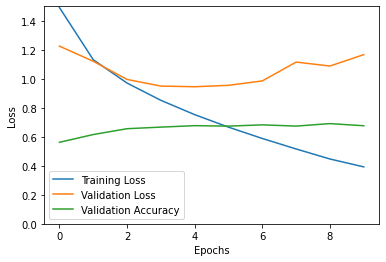

In [19]:
plt.plot(trained_model.history['loss'])
plt.plot(trained_model.history['val_loss'])
plt.plot(trained_model.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim((0, 1.5))
plt.legend(['Training Loss', 'Validation Loss', 'Validation Accuracy'])
plt.show()

In [20]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.1672 - accuracy: 0.6764


[1.1671901941299438, 0.6764000058174133]

In [21]:
predict_x = model.predict(x_test) 
print(classification_report(npy.argmax(y_test, axis=1),
                            npy.argmax(predict_x,axis=1)))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.73      0.69      0.71      1000
           1       0.77      0.76      0.77      1000
           2       0.54      0.67      0.60      1000
           3       0.48      0.51      0.49      1000
           4       0.61      0.64      0.63      1000
           5       0.64      0.49      0.56      1000
           6       0.74      0.80      0.77      1000
           7       0.82      0.66      0.73      1000
           8       0.77      0.76      0.77      1000
           9       0.72      0.77      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



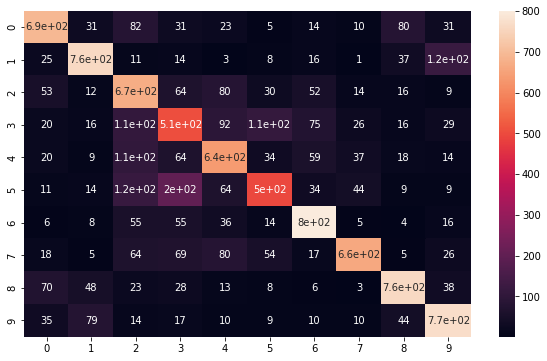

In [22]:
plt.figure(figsize = (10, 6))
sbn.heatmap(confusion_matrix(npy.argmax(y_test, axis=1),
                            npy.argmax(predict_x,axis=1)), 
            annot = True)

In [23]:
model = Sequential()

model.add(Conv2D(filters = 32, 
                 kernel_size = (4,4), 
                 input_shape = (32, 32, 3), 
                 activation = 'relu',
                 padding = 'same'))
model.add(Conv2D(filters = 32, 
                 kernel_size = (4,4
                                ), 
                 input_shape = (32, 32, 3), 
                 activation = 'relu',
                 padding = 'same'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 64, 
                 kernel_size = (4,4), 
                 input_shape = (32, 32, 3), 
                 activation = 'relu',
                 padding = 'same'))
model.add(Conv2D(filters = 64, 
                 kernel_size = (4,4), 
                 input_shape = (32, 32, 3), 
                 activation = 'relu',
                 padding = 'same'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 128, 
                 kernel_size = (4,4), 
                 input_shape = (32, 32, 3), 
                 activation = 'relu',
                 padding = 'same'))
model.add(Conv2D(filters = 256, 
                 kernel_size = (4,4), 
                 input_shape = (32, 32, 3), 
                 activation = 'relu',
                 padding = 'same'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 516, 
                 kernel_size = (4,4), 
                 input_shape = (32, 32, 3), 
                 activation = 'relu',
                 padding = 'same'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))

model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])

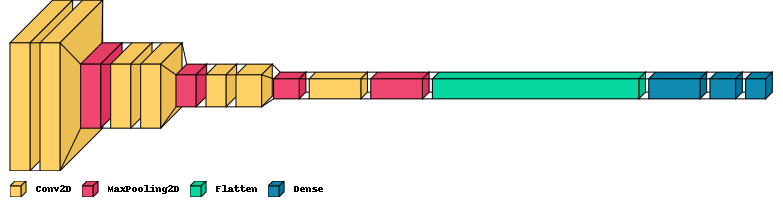

In [24]:
visualkeras.layered_view(model, legend = True)

In [25]:
trained_model = model.fit(x_train, y_train,
                          validation_data = (x_test, y_test),
                          batch_size = 32,
                          epochs = 100,
                          callbacks = [stopping_criteria]
                          )

Epoch 1/100
1563/1563 [==============================] - 11s 6ms/step - loss: 2.3029 - accuracy: 0.0986 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/100
1563/1563 [==============================] - 10s 6ms/step - loss: 2.3028 - accuracy: 0.1001 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/100
1563/1563 [==============================] - 10s 6ms/step - loss: 2.3028 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/100
1563/1563 [==============================] - 10s 6ms/step - loss: 2.3028 - accuracy: 0.0967 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/100
1563/1563 [==============================] - 10s 6ms/step - loss: 2.3028 - accuracy: 0.0980 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/100
1563/1563 [==============================] - 10s 6ms/step - loss: 2.3028 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.1000


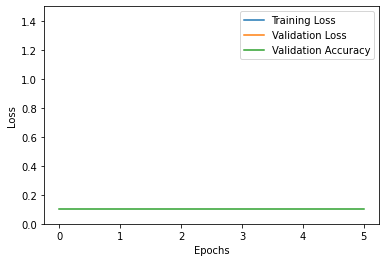

In [26]:
plt.plot(trained_model.history['loss'])
plt.plot(trained_model.history['val_loss'])
plt.plot(trained_model.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim((0, 1.5))
plt.legend(['Training Loss', 'Validation Loss', 'Validation Accuracy'])
plt.show()

In [27]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1000


[2.3026375770568848, 0.10000000149011612]

In [28]:
predict_x = model.predict(x_test) 
print(classification_report(npy.argmax(y_test, axis=1),
                            npy.argmax(predict_x,axis=1)))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.10      1.00      0.18      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


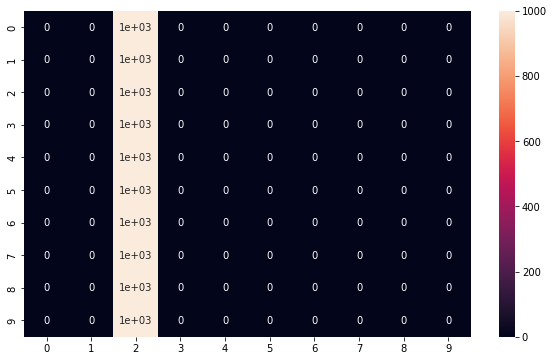

In [29]:
plt.figure(figsize = (10, 6))
sbn.heatmap(confusion_matrix(npy.argmax(y_test, axis=1),
                            npy.argmax(predict_x,axis=1)), 
            annot = True)

In [30]:
model = Sequential()

model.add(Conv2D(filters = 32, 
                 kernel_size = (4,4), 
                 input_shape = (32, 32, 3), 
                 activation = 'relu',
                 padding = 'same'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, 
                 kernel_size = (4,4
                                ), 
                 input_shape = (32, 32, 3), 
                 activation = 'relu',
                 padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, 
                 kernel_size = (4,4), 
                 input_shape = (32, 32, 3), 
                 activation = 'relu',
                 padding = 'same'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64, 
                 kernel_size = (4,4), 
                 input_shape = (32, 32, 3), 
                 activation = 'relu',
                 padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, 
                 kernel_size = (4,4), 
                 input_shape = (32, 32, 3), 
                 activation = 'relu',
                 padding = 'same'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 256, 
                 kernel_size = (4,4), 
                 input_shape = (32, 32, 3), 
                 activation = 'relu',
                 padding = 'same'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 512, 
                 kernel_size = (4,4), 
                 input_shape = (32, 32, 3), 
                 activation = 'relu',
                 padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(256, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])

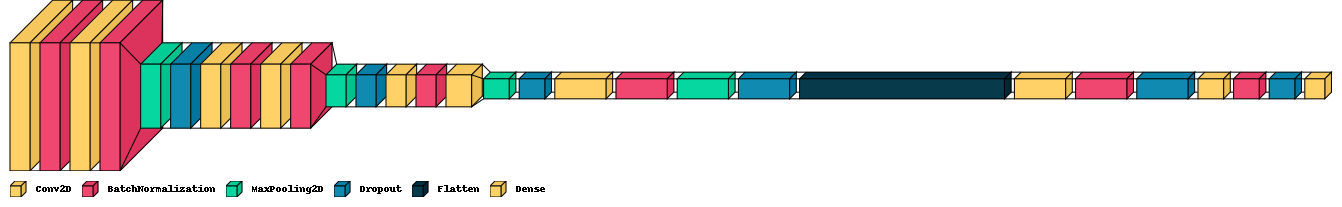

In [31]:
visualkeras.layered_view(model, legend = True)

In [32]:
trained_model = model.fit(x_train, y_train,
                          validation_data = (x_test, y_test),
                          batch_size = 32,
                          epochs = 100,
                          callbacks = [stopping_criteria]
                          )

Epoch 1/100
1563/1563 [==============================] - 15s 9ms/step - loss: 1.6292 - accuracy: 0.4229 - val_loss: 1.2359 - val_accuracy: 0.5808
Epoch 2/100
1563/1563 [==============================] - 13s 9ms/step - loss: 1.0578 - accuracy: 0.6280 - val_loss: 0.8715 - val_accuracy: 0.6912
Epoch 3/100
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8594 - accuracy: 0.7011 - val_loss: 0.7239 - val_accuracy: 0.7475
Epoch 4/100
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7367 - accuracy: 0.7487 - val_loss: 0.6957 - val_accuracy: 0.7631
Epoch 5/100
1563/1563 [==============================] - 13s 8ms/step - loss: 0.6495 - accuracy: 0.7782 - val_loss: 0.5916 - val_accuracy: 0.7968
Epoch 6/100
1563/1563 [==============================] - 13s 8ms/step - loss: 0.5825 - accuracy: 0.8028 - val_loss: 0.6088 - val_accuracy: 0.7947
Epoch 7/100
1563/1563 [==============================] - 13s 8ms/step - loss: 0.5289 - accuracy: 0.8186 - val_loss: 0.6030 -

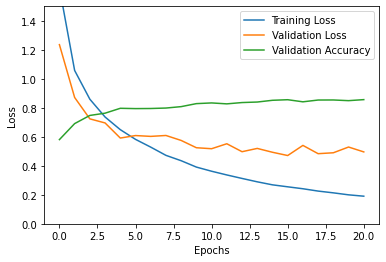

In [33]:
plt.plot(trained_model.history['loss'])
plt.plot(trained_model.history['val_loss'])
plt.plot(trained_model.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim((0, 1.5))
plt.legend(['Training Loss', 'Validation Loss', 'Validation Accuracy'])
plt.show()

In [34]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4959 - accuracy: 0.8566


[0.49590522050857544, 0.8565999865531921]

In [35]:
predict_x = model.predict(x_test) 
print(classification_report(npy.argmax(y_test, axis=1),
                            npy.argmax(predict_x,axis=1)))

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1000
           1       0.94      0.94      0.94      1000
           2       0.87      0.73      0.79      1000
           3       0.75      0.69      0.72      1000
           4       0.82      0.86      0.84      1000
           5       0.82      0.76      0.79      1000
           6       0.85      0.92      0.89      1000
           7       0.87      0.92      0.89      1000
           8       0.90      0.94      0.92      1000
           9       0.91      0.92      0.92      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.85     10000
weighted avg       0.86      0.86      0.85     10000



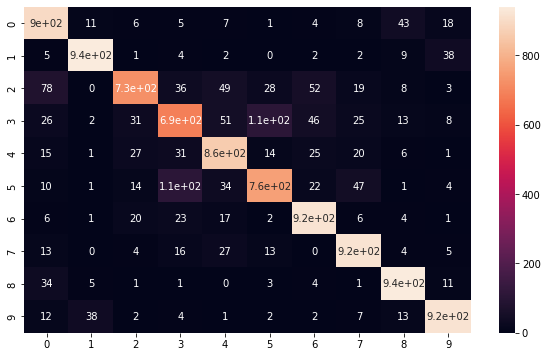

In [36]:
plt.figure(figsize = (10, 6))
sbn.heatmap(confusion_matrix(npy.argmax(y_test, axis=1),
                            npy.argmax(predict_x,axis=1)), 
            annot = True)

In [37]:
model = Sequential()

model.add(Conv2D(filters = 32, 
                 kernel_size = (4,4), 
                 input_shape = (32, 32, 3), 
                 activation = 'relu',
                 padding = 'same'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, 
                 kernel_size = (4,4
                                ), 
                 input_shape = (32, 32, 3), 
                 activation = 'relu',
                 padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, 
                 kernel_size = (4,4), 
                 input_shape = (32, 32, 3), 
                 activation = 'relu',
                 padding = 'same'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64, 
                 kernel_size = (4,4), 
                 input_shape = (32, 32, 3), 
                 activation = 'relu',
                 padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, 
                 kernel_size = (4,4), 
                 input_shape = (32, 32, 3), 
                 activation = 'relu',
                 padding = 'same'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 256, 
                 kernel_size = (4,4), 
                 input_shape = (32, 32, 3), 
                 activation = 'relu',
                 padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 512, 
                 kernel_size = (4,4), 
                 input_shape = (32, 32, 3), 
                 activation = 'relu',
                 padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(256, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])

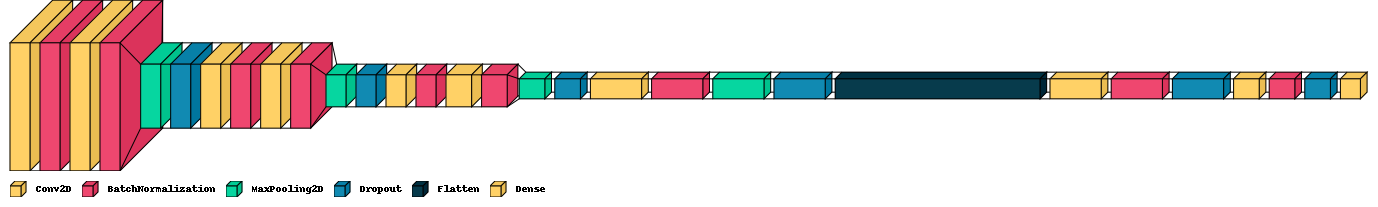

In [38]:
visualkeras.layered_view(model, legend = True)

In [39]:
data_generator = ImageDataGenerator(width_shift_range=0.1, 
                                    height_shift_range=0.1, 
                                    horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, 32)

trained_model = model.fit(train_generator,
                          validation_data = (x_test, y_test),
                          batch_size = 32,
                          epochs = 100,
                          callbacks = [stopping_criteria]
                          )

Epoch 1/100
1563/1563 [==============================] - 27s 16ms/step - loss: 1.7029 - accuracy: 0.3969 - val_loss: 1.3193 - val_accuracy: 0.5320
Epoch 2/100
1563/1563 [==============================] - 25s 16ms/step - loss: 1.2034 - accuracy: 0.5720 - val_loss: 1.2635 - val_accuracy: 0.5788
Epoch 3/100
1563/1563 [==============================] - 25s 16ms/step - loss: 0.9988 - accuracy: 0.6518 - val_loss: 0.8933 - val_accuracy: 0.6962
Epoch 4/100
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8817 - accuracy: 0.6973 - val_loss: 0.8950 - val_accuracy: 0.7077
Epoch 5/100
1563/1563 [==============================] - 25s 16ms/step - loss: 0.7927 - accuracy: 0.7287 - val_loss: 0.6742 - val_accuracy: 0.7662
Epoch 6/100
1563/1563 [==============================] - 25s 16ms/step - loss: 0.7252 - accuracy: 0.7526 - val_loss: 0.6193 - val_accuracy: 0.7863
Epoch 7/100
1563/1563 [==============================] - 25s 16ms/step - loss: 0.6796 - accuracy: 0.7699 - val_loss: 0

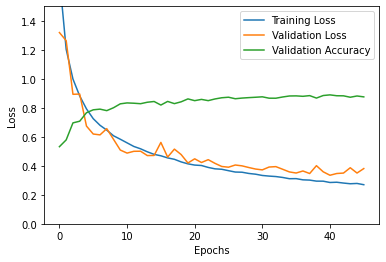

In [40]:
plt.plot(trained_model.history['loss'])
plt.plot(trained_model.history['val_loss'])
plt.plot(trained_model.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim((0, 1.5))
plt.legend(['Training Loss', 'Validation Loss', 'Validation Accuracy'])
plt.show()

In [41]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3810 - accuracy: 0.8756


[0.38098838925361633, 0.8755999803543091]

In [42]:
predict_x = model.predict(x_test) 
print(classification_report(npy.argmax(y_test, axis=1),
                            npy.argmax(predict_x,axis=1)))

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      1000
           1       0.95      0.96      0.95      1000
           2       0.90      0.77      0.83      1000
           3       0.78      0.72      0.75      1000
           4       0.90      0.84      0.87      1000
           5       0.84      0.79      0.81      1000
           6       0.74      0.97      0.84      1000
           7       0.95      0.91      0.93      1000
           8       0.94      0.93      0.94      1000
           9       0.90      0.96      0.92      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



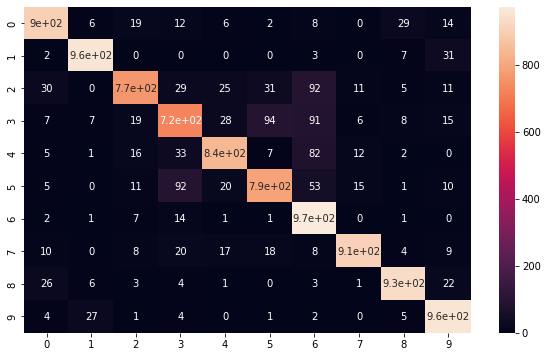

In [43]:
plt.figure(figsize = (10, 6))
sbn.heatmap(confusion_matrix(npy.argmax(y_test, axis=1),
                            npy.argmax(predict_x,axis=1)), 
            annot = True)